# Where in London to open a new Luxury Wine Bar


This project was part of the **IBM Applied Data Science Capstone** on Coursera. 
The main objectives of the project were to define a business problem (where to invest), to identify data in the web and use *Foursquare location API* to compare different neighbourhoods in terms of suitability of investment. 
This is an updated and simplified version of the capstone project I uploaded on this Github few weeks ago.

## This Jupyter Notebook does not render the interactive maps. Follow the link below to see the 4 MAPS included below. 

**__[the Jupyter NBviewer](https://nbviewer.jupyter.org/github/advensorBI/Machine-Learning/blob/master/Maps%20only%20wine%20bar.ipynb)__**


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

* [1. Business Problem and Background](#introduction)
* [2. Methodology](#methodology)
* [3. Data access](#data)
* [4. Analysis: Mapping London Wards (neighborhoods)](#analysis)
* [4.1. Create map of all wards in London ](#map1)
* [4.2. Explore Wards in London through Venue Clustering ](#map2)
* [4.3. Clustering the Wards/ Neighborhoods in London](#explore)
* [4.3.1. London Wards distribution according to venue Clustering](#explore2)
* [4.4. Description of the Cluster Segments](#explore3)
* [4.5. Demographic description of London Boroughs](#explore4)
* [4.5.1. Aspects correlated with Household Income in London Wards](#explore5)
* [5. Results and Discussion](#results)
* [5.1. Identification of High Income Wards as potential places of opening a Luxury Wine Bar](#results1)
* [5.2. Overall discussion of the results](#results2)    
* [6. Recommendations](#Recommendations)

</font>
</div>


## 1. Business Problem and Background <a name="introduction"></a>

    


## Project structure

The project will evaluate in which **wards** of London would be preferable to invest for opening a new **Wine Bar** or a chain of wine bars. The project  will describe all analytical steps from data access, data analysis and visualisation to final recommendation of 5 to 10 wards in which is recommendable to open a new wine bar. 

In this project, we will explain in a step by step manner from *business problem and background*, to *data access* and preparation, from *methodology* to *statistical data analysis* and conclusions. 
A set of recommendations will be proposed to the business stakeholders to make their decisions related to feasability of investment. 

Although neighbourhoods are proposed as units of analysis the wards will be analysed as these administrative teritorial units of London are easily identifiable by people and they are big enough as population size to be relevant from business perspective. 

## Business problem 

Having a stable population of 8.6 million people and a daytime population of over 10 million people (__[London Datastore](https://data.london.gov.uk/dataset/daytime-population-borough)__), London is the biggest city in Europe. London has a relatively young population, of people who mainly come here to study and work. London is extremelly diverse from cultural and ethnic point of view has a strong hospitality sector consisting mainly in restaurant, hotels, pubs, bars and coffee shops. 
Especially pubs are extremelly popular in London as they represent an important socialising place for Londoners and tourists. 
According to *2016 Pub Audit*, there were **3615** pubs in London a decline from 4835 pubs back in 2001 (__[Estate agent London News](https://www.greaterlondonproperties.co.uk/how-many-pubs-in-london/)__ , 2018). Although many pubs might closed their doors due to high rents and taxes and strong competitive environment, another important factor can be the change in consumer behaviour as a considerable segment of consumers prefer to switch from drinking beer which is the dominant product sold in pubs to drinnking wines which tends to be bought for domestic consumption but also consumed in wine bars. As millenials seem to be spend more money on good quality wines, opening a chain of wine bars in London can potentially answer to an increasing need to educate consumers in this direction. 
This report can be of interest for investors who might be interested in creating an alternative gathering places to pubs, coffee shops and restaurants. 
Although wines can be served in multiple places it is mainly bought by londoners from retails stores and consumed at home. 
Wine bars can potentially offer a more sophisticated place to spend time in spaces less crowded such as pubs. 
### Socio-demographic profile of wine consumers

According to a study proposed by __[Duke University](https://sites.duke.edu/sociol342d_001_s2014_wine/global-value-chains/types-of-consumers/)__  (2014) wine consumers can overall be classified as 
**overwhelmed (23%)** by the available choices on store shelves, **Image Seekers (20%)** who use wine as a symbol of status, **traditionalists (16%)** who have clear established preferences, the **Savy Shoppers (16%)** who "enjoy shopping for wine and discovering new varietal s on their own", **Satisfied Sippers (14%)** who simply like to drink and **wine enthusiasts (12%)** who "consider themselves knowledgeable about wine". Although this study was not performed in London, it is reasonable to assume the profiles can easily fit London wine market. 


## 2. Methodology <a name="methodology"></a>

Several Python packages and statistical procedures will be involved in analysing the two datasets. 

* Pandas **Crosstabulation** will be used to perform exploratory data analysis (**EDA**) on association between boroughs and cluster or between venues and clusters when the content of clusters will be described.
* Pandas package was used also for separating a string variable containing both Borough and Ward name into two separate columns, for excluding or keeping specific variables. Joining separate datasets was also performed using Pandas library.  
* **K-means clustering** will be used to alocate each of London's wards into a cluster based on what venues they include,  
* Matplotlib **histograms** and **scatter-plot graphs** will be used to plot the data and the association between demographic data, 
* **Descriptive statistics** (means, etc) will be performed while grouping by boroughs to document the proposal we need to make regardinng the wards where to open the wine bars. Following the 1st stage in which some candidate wards will be identified based on their componence in the 2nd stage of the analysis the socio-demographic profiles of the wards will be analysed.  

In the 1st step the venue cluster will be created. Secondly it will be decided which wards are more attractive for potential investments in luxury wine bars based on their demographic profile.
Next the cluster of each selected wards will be identified and a recommendation will be made where would be recommendable to open the wine bars.  

## 3. Data access <a name="data"></a>

Two datasets will be analysed in order to develop and propose some strategic recommendation regarding the feasibility of opening some Wine Bars in some of London wards.

## 3.1. London Wards geolocation dataset


The first dataset was accessed from __[Data.Gov.UK](https://data.gov.uk/dataset/91d74368-7352-41d8-8939-b6cf385c73a1/wards-december-2016-super-generalised-clipped-boundaries-in-great-britain)__
. From this webpage which offers geolocation data for all *8668 wards in the UK*, I already excluded the wards which are not part of Greater London Area which is our market of interest. 
Further down variables were renamed, excluded and cleaned of missing values. Finally only 4 variables such as Borough, Ward (Neighbourhood), Latitude and Longitude for **654 wards in Greater London Area** were kept for analysis.  
Using the **Foursquare location API** the venues of interest in these wards will be identified and a KNN segmentation will be performed to clasify the wards based on the componence of their venues. Once created the profiles for each cluster will be developed using Pandas Crosstabulations.  

In [1]:
## Inporting the necessary packages to import datasets and perform analysis

import pandas as pd
import os
import numpy as np
import matplotlib 
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as pet

In [2]:
# Importing the Geographic Coordinates of each of UK's 8668 as a CSV format file. 
# It is not possible to import the dataset directly from the indicated web page as there are provided several dataset. 
# Also because some latitude and longitude created problems when imported from my github account I performed a local import for this dataset but an online import for the next one.  

os.chdir("C://@@ Default Folder Python Notebooks")


In [3]:
## Importing the dataset with all neighborhoods / wards from London
neighborhoods = pd.read_csv('Wards__December_2016__Boundaries.csv', encoding='ANSI')
## Observing if the new dataset is similar with the DF. 

In [4]:
# This approach allows us to drop multiple columns at a time 
neighborhoods = neighborhoods.drop(columns=['objectid', 'wd16cd', 'wd16nmw', 'lad16cd', 'bng_e', 'bng_n', 'st_areashape', 'st_lengthshape'])


In [5]:
# Rename Variables 
neighborhoods = neighborhoods.rename(columns={'wd16nm':'Neighborhood',
                        'lad16nm': 'Borough', 
                        'long': 'Longitude',
                        'lat': 'Latitude'})


**neighborhoods** dataset will be used in sections **4.1**, **4.2** and **4.3.** of this report. 


## 3.2. London wards socio-demographic profiling

Another dataset containing several social and demographic details at wards level was accessed from __[London Datastore](https://data.london.gov.uk/download/ward-profiles-and-atlas/a187b63e-bf4f-4449-b644-ab86a0a8569d/ward-profiles-excel-version.xls)__.  
This dataset contains details about population size, age structure, mean age per ward, population density, proportion of Black and Ethnic Minorities according to 2011 Census; children obesity, employment indicators, education, access to state benefits. The proportion of rented and owned houses in the ward or the council tax bands would offer more indications about the financial afluence of those living in a wards. 
Conbining the initial cluster structure with the socio-demographic profiling it will be possible to recommend in which wards is most recommended to open one of more Wine Bars. 

In [6]:
## Importing the "London wards socio-demographic profiling" dataset

demographics = pd.read_excel (r'https://data.london.gov.uk/download/ward-profiles-and-atlas/a187b63e-bf4f-4449-b644-ab86a0a8569d/ward-profiles-excel-version.xls', sheet_name='Data')

In [7]:
# DROP multiple columns at a time 

demographics = demographics.drop(columns=[ 'New code', 'Old code', 'General Fertility Rate - 2013', 
                                          'Male life expectancy -2009-13',
                                          'Crime rate - 2014/15', 
                                          'Violence against the person rate - 2014/15', 
                                          'Deliberate Fires per 1,000 population - 2014', 
                                          'Turnout at Mayoral election - 2012', 
                                          'Average Public Transport Accessibility score - 2014',
                                          '% children in reception year who are obese - 2011/12 to 2013/14',
                                           '% children in year 6 who are obese- 2011/12 to 2013/14',
                                           'Rate of All Ambulance Incidents per 1,000 population - 2014',
                                           'Rates of ambulance call outs for alcohol related illness - 2014',
                                           'Number Killed or Seriously Injured on the roads - 2014',
                                          '(ID2010) - Rank of average score (within London) - 2010',
                                          '(ID2010) % of LSOAs in worst 50% nationally - 2010',
                                          'Average GCSE capped point scores - 2014',
                                          'Unauthorised Absence in All Schools (%) - 2013',
                                          '% with no qualifications - 2011',
                                          'A-Level Average Point Score Per Student - 2013/14',
                                          'A-Level Average Point Score Per Entry; 2013/14', 
                                          'Cars per household - 2011', 'Female life expectancy -2009-13 ', 
                                          'In employment (16-64) - 2011',
                                           'Employment rate (16-64) - 2011', 
                                          'Number of jobs in area - 2013',
                                          'Employment per head of resident WA population - 2013',
                                           'Rate of new registrations of migrant workers - 2011/12',
                                          '% English is First Language of no one in household - 2011', 
                                          '% dependent children (0-18) in out-of-work households - 2014', 
                                          '% of households with no adults in employment with dependent children - 2011',
                                          '% of lone parents not in employment - 2011', 
                                          'Children aged 0-15 - 2015', 
                                          'Working-age (16-64) - 2015', 
                                          'Older people aged 65+ - 2015',  
                                          '% dwellings in council tax bands C, D or E - 2015',
                                          '% dwellings in council tax bands F, G or H - 2015',
                                          'Claimant rate of key out-of-work benefits (working age client group) (2014)',
                                          'Claimant Rate of Housing Benefit (2015)',
                                          'Claimant Rate of Employment Support Allowance - 2014',
                                          'Rate of JobSeekers Allowance (JSA) Claimants - 2015',
                                          '% All Older people aged 65+ - 2015','% BAME - 2011',
                                          '% Not Born in UK - 2011', 
                                          'Number of Household spaces - 2011'])


In [8]:
demographics.shape
## As the number of wards seems different from the expected 654 we investigate the dataframe 

(661, 22)

In [9]:
## Observe the last 20 rows. Delete the # in the row below.

# demographics.tail(20)

In [11]:
## It looks the dataset includes national and borough levels data. To observe I Created a list including only the wards
wards = demographics ['Ward name']

#Delete the "#" in the row below.

print(list(wards))

## As City of London appears both as Ward level and also as Borough Level ... the top case (index 0) will be excluded 

## This suggest Boroughs, London and England Overall are included in the dataset 
## They will be eliminated 

In [12]:
## A list of names for the Rows to be excluded was created 

excluded = 'London', 'England', 'Source:', 'Barking and Dagenham', 'Barnet','Bexley','Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham','Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington and Chelsea','Kingston upon Thames','Lambeth','Lewisham','Merton','Newham', 'Redbridge','Richmond upon Thames','Southwark','Sutton', 'Tower Hamlets', 'Waltham Forest','Wandsworth', 'Westminster'

In [13]:
## The "excluded" list elements were eliminated from demographics dataset 

demographics = demographics.drop(demographics[demographics['Ward name'].isin(excluded)].index.tolist())

# demographics['Ward name']

In [14]:
## Exclude row with index 0 as it appears also in row 625

demographics1 = demographics.drop([0])

In [15]:
### Add and ID case number to each ward 
demographics1 ['ID_case'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625]

# demographics1.head()


In [16]:
## Spliting the Ward Name Column which includes Borough and Ward into Borough and Wards as separate columns 
d2 = demographics1['Ward name'].str.partition('-')[[0,1,2]]

d2.columns = ['Borough', '11','Ward']
## Droping the column which includes the hyphen (separation marker)
d3 = d2.drop(['11'], axis=1)

### Add and ID case number to each ward 
d3['ID_case'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625]

# d3

**Demographics_London** is a dataset to be used in the final sequence of the analysis. 

In [17]:
## Joining the 2 dataframes to have a Column with Ward name only 

Demographics_London = d3.merge(demographics1, left_on = 'ID_case', right_on = 'ID_case')

# Demographics_London.head()

In [18]:
# Rename Variables 
Demographics_London = Demographics_London.rename(columns={'Borough':'BOROUGH',
                        'Mean Age - 2013': 'Mean Age', 
                        '% All Working-age (16-64) - 2015': '%_Working_age',
                        'Number of properties sold - 2014': 'Sold_properties',
                        '% All Children aged 0-15 - 2015':'% Children 0-15',
                        'Population - 2015': 'Population', 
                        'Median Age - 2013': 'Median Age',
                        'Population density (persons per sq km) - 2013': 'Population density', 
                        'Median House Price (£) - 2014': 'Median House Price',
                        'Median Household income estimate (2012/13)': 'Median Household income',
                        '% Households Owned - 2011': '% Owners',
                        '% detached houses - 2011': 'Detached Houses',                        
                        '% Flat, maisonette or apartment - 2011': 'Flats',
                        '% Households Social Rented - 2011': '% Social Rents',                        
                        '% Households Private Rented - 2011': 'Private Rents',
                        '% dwellings in council tax bands A or B - 2015': '% Council tax A/B',                        
                        '% with Level 4 qualifications and above - 2011': '% University studies',                                                                       
                        '% area that is open space - 2014': '% Open Space'})  



In [19]:
## As the columns format is inconsistent all are coerced to be integers. 

Demographics_London['Population'] = Demographics_London['Population'].astype(int)
Demographics_London['% Children 0-15'] = Demographics_London['% Children 0-15'].astype(int)
Demographics_London['%_Working_age'] = Demographics_London['%_Working_age'].astype(int)
Demographics_London['Mean Age'] = Demographics_London['Mean Age'].astype(int)
Demographics_London['Area - Square Kilometres'] = Demographics_London['Area - Square Kilometres'].astype(int)
Demographics_London['Population density'] = Demographics_London['Population density'].astype(int)
Demographics_London['Median House Price'] = Demographics_London['Median House Price'].astype(int)
Demographics_London['Sold_properties'] = Demographics_London['Sold_properties'].astype(int)
Demographics_London['Median Household income'] = Demographics_London['Median Household income'].astype(int)
Demographics_London['Detached Houses'] = Demographics_London['Detached Houses'].astype(int)
Demographics_London['% semi-detached houses - 2011'] = Demographics_London['% semi-detached houses - 2011'].astype(int)
Demographics_London['% terraced houses - 2011'] = Demographics_London['% terraced houses - 2011'].astype(int)
Demographics_London['Flats'] = Demographics_London['Flats'].astype(int)
Demographics_London['% Owners'] = Demographics_London['% Owners'].astype(int)
Demographics_London['% Social Rents'] = Demographics_London['% Social Rents'].astype(int)
Demographics_London['Private Rents'] = Demographics_London['Private Rents'].astype(int)
Demographics_London['% Council tax A/B'] = Demographics_London['% Council tax A/B'].astype(int)
Demographics_London['% University studies'] = Demographics_London['% University studies'].astype(int)
Demographics_London['% Open Space'] = Demographics_London['% Open Space'].astype(int)
Demographics_London['% travel by bicycle to work - 2011'] = Demographics_London['% travel by bicycle to work - 2011'].astype(int)


In [ ]:
Demographics_London.head()

This Dataset will be used in section 4.4. 

## 4. Analysis: Mapping London Wards (neighborhoods) <a name="analysis"></a>

In [20]:
## Importing the packages for 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [21]:
address = 'London UK'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of London are 51.5073219, -0.1276474.


## 4.1. Create map of all wards in London <a name="map1"></a>


An initial map of all *654 London wards* was created using the given latitude and longitude. 
Using *Fourthsquare API* a radius of 500 meters was chosen to identify venues of interest around indicated wards. 
Finally, a total number of *12192 places of interest* were identified around these 654 wards. 

In [22]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], 
                                           neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

Map 1. Representation of all 654 London wards. 

In [23]:
CLIENT_ID = 'secret' # your Foursquare ID
CLIENT_SECRET = 'secret' # your Foursquare Secret


VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: secret
CLIENT_SECRET:secret


In [24]:
neighborhoods.loc[0, 'Neighborhood']

'Abbey'

In [25]:
neighborhoods.head()

,Neighborhood,Borough,Longitude,Latitude
0,Abbey,Barking and Dagenham,0.081291,51.539822
1,Alibon,Barking and Dagenham,0.150987,51.545921
2,Becontree,Barking and Dagenham,0.116912,51.552601
3,Chadwell Heath,Barking and Dagenham,0.138596,51.583420
4,Eastbrook,Barking and Dagenham,0.173453,51.555191


In [26]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Abbey are 51.53982162, 0.081291.


In [28]:
# limit of number of venues returned by Foursquare API

LIMIT = 100  # 100 initially
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=secret&client_secret=secret&v=20180605&ll=51.53982162,0.081291&radius=500&limit=100'

In [29]:
results = requests.get(url).json()
#results   # The output is not visible as it is extremelly long. 

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']    

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

In [ ]:
nearby_venues.shape

As an example we can observe that near **Abbey ward** there are **16** venue places. 

## 4.2. Explore Wards in London through Venue Clustering  <a name="map2"></a>


 The above created function was applied to repeat the same process to all the neighborhoods (**wards**) in London to identify all 12192 places of interest. While grouping the venues by **Venue Category** and soting it descending by number it can be observed there are **841** Pubs, **710** Coffee shops, **630** Cafee and **438** Hotels. This indicate a strong demand for such leisure places which indicates potentially a solid investment opportunity. Interestingly, the histogram chart in this section indicates that out of 654 wards there are 400+ wards which have between 0 to 20 venues. This suggests these might be excluded from the list of potential investment places, reducing the number of neighborhoods of interest to around 200.  


In [ ]:
### You will need to insert your Client ID and Client Secret in Foursquare API 

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
London_venues = getNearbyVenues(names = neighborhoods['Neighborhood'],
                                   latitudes = neighborhoods['Latitude'],
                                   longitudes = neighborhoods ['Longitude']
                                  )

The version of Fourthsquare API I used was a free one which has some restriction and also it take couple of minutes to generate the list of venues. 
To avoid waiting too long or avoiding any errors you might received if you ask for almost 13.000 places I saved the dataset initially.
To facilitate the smoothness of the next steps you can upload the dataset instead of waiting 5 minutes for the previous command to run or to avoid eventual errors.   

In [30]:
## Importing the dataset with all Venues from London as exported by the Fourthsquare API 
London_venues = pd.read_csv('https://raw.githubusercontent.com/sebastianBIanalytics/Coursera_Capstone/master/London_Venues.csv', encoding='ANSI')

In [82]:
print(London_venues.shape)
London_venues.head()

(12192, 8)


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Abbey,51.539822,0.081291,Nando's,51.539780,0.082297,Portuguese Restaurant
1,1,Abbey,51.539822,0.081291,Cristina's,51.536523,0.076672,Steakhouse
2,2,Abbey,51.539822,0.081291,The Gym London Barking,51.536193,0.078601,Gym
3,3,Abbey,51.539822,0.081291,Subway,51.538000,0.081319,Sandwich Place
4,4,Abbey,51.539822,0.081291,Costa Coffee,51.539272,0.081341,Coffee Shop


In [31]:
## Count the number of venues in each neighborhood
## With a single exception the maximum number of venues was 100.  
Venues_Ward = London_venues.groupby('Neighborhood').count().sort_values('Venue', ascending=False)
#Venues_Ward.head()

In [32]:
Venues_Ward.columns

Index(['Unnamed: 0', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [33]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


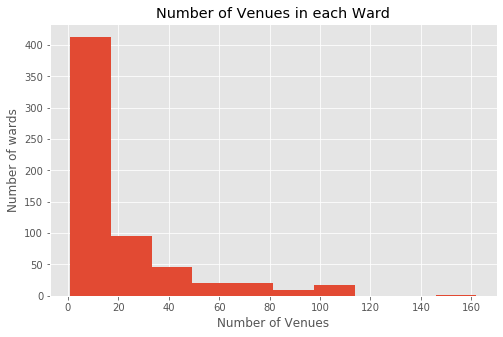

In [34]:
Venues_Ward['Venue'].plot(kind='hist', figsize=(8, 5))

plt.title('Number of Venues in each Ward') # add a title to the histogram
plt.ylabel('Number of wards') # add y-label
plt.xlabel('Number of Venues') # add x-label

plt.show()

Figure 1. Histogram of Number of Venues in each neighborhood. 

### The histogram above indicates that out of 654 wards there are 400+ wards which have between 0 to 20 venues. This suggests these might be excluded from the list of potential investment places. Overall, there are already at least 12192 venues identified in London wards. The count table below suggest the pubs, coffee shops cafe-s, hotels and grocery store are the most popular venues as identified by the Fourthsquare API from the total of 425 uniques categories. 

In [35]:
## Group the number of each venue type and sort the numbers descending 
## create a new dataframe 

countVenues = London_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False)

countVenues.head(10)

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,
Pub,841,841,841,841,841,841,841
Coffee Shop,710,710,710,710,710,710,710
CafÃ©,630,630,630,630,630,630,630
Hotel,428,428,428,428,428,428,428
Grocery Store,422,422,422,422,422,422,422
Italian Restaurant,367,367,367,367,367,367,367
Park,343,343,343,343,343,343,343
Gym / Fitness Center,280,280,280,280,280,280,280
Indian Restaurant,273,273,273,273,273,273,273


In [36]:
print('There are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

There are 425 uniques categories.


## For the next sequence of the analysis dummy variables from each venue were created increasing the number of variables to 426. Then a function was created to identify the top 5 places from each ward. Finally a new dataset **neighborhoods_venues_sorted** was created and this included strictly the name of wards and the columns with the top 10 venues in each ward    

In [37]:
# one hot encoding
London_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")
#London_onehot.head()

In [38]:
# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = London_venues['Neighborhood'] 
#London_onehot.head()

In [39]:
# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

#London_onehot.head()

In [40]:
London_onehot.shape

(12192, 426)

In [41]:
London_grouped = London_onehot.groupby('Neighborhood').mean().reset_index()
#London_grouped.head()

In [42]:
## Identify the top 5 venues in each Ward

num_top_venues = 5

for hood in London_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey----
           venue  freq
0  Grocery Store  0.12
1            Pub  0.09
2    Coffee Shop  0.09
3    Pizza Place  0.06
4    Supermarket  0.06


----Abbey Road----
                       venue  freq
0                      CafÃ©  0.09
1          French Restaurant  0.05
2              Grocery Store  0.05
3         Persian Restaurant  0.05
4  Middle Eastern Restaurant  0.05


----Abbey Wood----
                           venue  freq
0                  Grocery Store   0.5
1                     Playground   0.5
2                            ATM   0.0
3  Paper / Office Supplies Store   0.0
4                      Pet Store   0.0


----Abingdon----
                 venue  freq
0                Hotel  0.08
1   Italian Restaurant  0.07
2                  Pub  0.07
3                CafÃ©  0.07
4  Japanese Restaurant  0.03


----Acton Central----
             venue  freq
0    Grocery Store  0.25
1    Train Station  0.12
2            Hotel  0.12
3   Breakfast Spot  0.12
4  Bed & Breakfast  

4  Pet CafÃ©   0.0


----Blackheath Westcombe----
                    venue  freq
0  Furniture / Home Store  0.14
1      Chinese Restaurant  0.14
2           Grocery Store  0.14
3    Fast Food Restaurant  0.14
4                     Pub  0.14


----Blackwall & Cubitt Town----
                venue  freq
0      Sandwich Place  0.08
1         Coffee Shop  0.08
2    Sushi Restaurant  0.06
3            Bus Stop  0.06
4  Italian Restaurant  0.05


----Blendon and Penhill----
               venue  freq
0              CafÃ©   0.2
1      Grocery Store   0.2
2        Supermarket   0.2
3  Indian Restaurant   0.2
4                Pub   0.2


----Bloomsbury----
               venue  freq
0        Coffee Shop  0.16
1            Exhibit  0.10
2                Bar  0.06
3          Bookstore  0.04
4  French Restaurant  0.04


----Boleyn----
              venue  freq
0             CafÃ©  0.22
1               Pub  0.22
2  Toy / Game Store  0.11
3     Grocery Store  0.11
4       Pizza Place  0.11


----Bo

4                  Pub  0.08


----Cathedrals----
                venue  freq
0                 Pub  0.07
1               Hotel  0.07
2         Coffee Shop  0.05
3  Italian Restaurant  0.05
4               CafÃ©  0.04


----Cavendish----
                           venue  freq
0     Construction & Landscaping  0.33
1                       Pharmacy  0.33
2                           Park  0.33
3                            ATM  0.00
4  Paper / Office Supplies Store  0.00


----Cazenove----
           venue  freq
0   Tennis Court   0.2
1  Deli / Bodega   0.2
2            Pub   0.2
3          CafÃ©   0.2
4           Park   0.2


----Chadwell Heath----
               venue  freq
0      Grocery Store   0.2
1         Restaurant   0.2
2          Mini Golf   0.2
3  Indian Restaurant   0.2
4              Hotel   0.2


----Chapel End----
                  venue  freq
0  Gym / Fitness Center   0.2
1          Soccer Field   0.2
2                   Pub   0.2
3              Bus Stop   0.2
4            

4     Soccer Stadium  0.14


----Coulsdon West----
                venue  freq
0  Italian Restaurant   0.1
1                 Pub   0.1
2         Supermarket   0.1
3           Gift Shop   0.1
4       Grocery Store   0.1


----Courtfield----
                venue  freq
0               Hotel  0.12
1  Italian Restaurant  0.05
2              Bakery  0.04
3        Burger Joint  0.04
4      Sandwich Place  0.04


----Cranbrook----
           venue  freq
0  Event Service   0.2
1    Yoga Studio   0.2
2   Soccer Field   0.2
3       Bus Stop   0.2
4          Hotel   0.2


----Cranford----
               venue  freq
0  Convenience Store  0.25
1             Tunnel  0.25
2         Restaurant  0.25
3        Bus Station  0.25
4                ATM  0.00


----Cranham----
                venue  freq
0                Farm   1.0
1                 ATM   0.0
2  Photography Studio   0.0
3           Pet Store   0.0
4           Pet CafÃ©   0.0


----Cray Meadows----
                venue  freq
0               

4   Metro Station   0.2


----Eastcote and East Ruislip----
               venue  freq
0  Convenience Store  0.25
1   Indoor Play Area  0.25
2  Indian Restaurant  0.25
3           Gym Pool  0.25
4                ATM  0.00


----Edgware----
                venue  freq
0                Park   1.0
1                 ATM   0.0
2  Physical Therapist   0.0
3            Pharmacy   0.0
4           Pet Store   0.0


----Edmonton Green----
           venue  freq
0          Hotel   0.2
1     Boxing Gym   0.2
2  Go Kart Track   0.2
3          CafÃ©   0.2
4         Bakery   0.2


----Elm Park----
                           venue  freq
0                  Grocery Store   0.5
1              Fish & Chips Shop   0.5
2                            ATM   0.0
3  Paper / Office Supplies Store   0.0
4                      Pet Store   0.0


----Eltham North----
                venue  freq
0                Park   0.4
1              Bakery   0.2
2              Forest   0.2
3   Convenience Store   0.2
4  Photograph

4                 Coffee Shop   0.2


----Goodmayes----
                venue  freq
0                Park  0.25
1           Rest Area  0.25
2  Chinese Restaurant  0.25
3         Pizza Place  0.25
4                 ATM  0.00


----Gooshays----
                venue  freq
0               Trail   1.0
1                 ATM   0.0
2  Photography Studio   0.0
3           Pet Store   0.0
4           Pet CafÃ©   0.0


----Goresbrook----
                  venue  freq
0          Soccer Field  0.29
1  Gym / Fitness Center  0.14
2                   Gym  0.14
3     Convenience Store  0.14
4           Pizza Place  0.14


----Gospel Oak----
               venue  freq
0          Gastropub  0.13
1              CafÃ©  0.07
2  French Restaurant  0.07
3             Museum  0.07
4           Platform  0.07


----Grange----
                       venue  freq
0                   Bus Stop  0.11
1                Coffee Shop  0.08
2                        Pub  0.08
3  Middle Eastern Restaurant  0.05
4            

4           Pharmacy  0.00


----Heston Central----
                           venue  freq
0      Middle Eastern Restaurant  0.33
1                     Food Truck  0.33
2              Indian Restaurant  0.33
3                            ATM  0.00
4  Paper / Office Supplies Store  0.00


----Heston East----
                venue  freq
0   Fish & Chips Shop  0.25
1   Convenience Store  0.25
2         Supermarket  0.25
3  Chinese Restaurant  0.25
4                 ATM  0.00


----Heston West----
                  venue  freq
0             Bookstore  0.25
1                Bakery  0.12
2         Grocery Store  0.12
3           Coffee Shop  0.12
4  Fast Food Restaurant  0.12


----High Barnet----
            venue  freq
0  Discount Store   0.2
1     Supermarket   0.2
2          Market   0.2
3             Pub   0.2
4     Coffee Shop   0.2


----High Street----
                       venue  freq
0                  Reservoir   0.4
1             Scenic Lookout   0.4
2  Middle Eastern Restaurant 

4             Pizza Place  0.09


----Lancaster Gate----
         venue  freq
0        Hotel  0.15
1          Pub  0.07
2  Coffee Shop  0.07
3       Garden  0.05
4        CafÃ©  0.05


----Langbourn----
                  venue  freq
0                 Hotel  0.09
1  Gym / Fitness Center  0.07
2        Sandwich Place  0.05
3          Cocktail Bar  0.05
4            Restaurant  0.05


----Lansbury----
                 venue  freq
0  Fried Chicken Joint  0.25
1               Tunnel  0.25
2   Light Rail Station  0.25
3                 Park  0.25
4   Physical Therapist  0.00


----Larkhall----
           venue  freq
0    Coffee Shop  0.10
1          CafÃ©  0.10
2  Grocery Store  0.10
3         Bakery  0.10
4            Bar  0.05


----Larkswood----
                  venue  freq
0                   Gym   0.4
1  Gym / Fitness Center   0.2
2    English Restaurant   0.2
3   American Restaurant   0.2
4                   ATM   0.0


----Latchmere----
           venue  freq
0         Bakery  0.11
1

                venue  freq
0         Coffee Shop  0.12
1                 Pub  0.12
2  Italian Restaurant  0.08
3       Train Station  0.04
4   Indian Restaurant  0.04


----Noel Park----
                      venue  freq
0      Fast Food Restaurant  0.11
1            Clothing Store  0.08
2                       Pub  0.08
3  Mediterranean Restaurant  0.06
4        Turkish Restaurant  0.06


----Nonsuch----
                venue  freq
0                 Gym   1.0
1                 ATM   0.0
2  Photography Studio   0.0
3           Pet Store   0.0
4           Pet CafÃ©   0.0


----Norbiton----
                  venue  freq
0        Breakfast Spot  0.25
1  Gym / Fitness Center  0.25
2            Food Truck  0.25
3        Soccer Stadium  0.25
4                   ATM  0.00


----Norbury----
                venue  freq
0       Grocery Store  0.16
1            Platform  0.11
2          Steakhouse  0.05
3      Ice Cream Shop  0.05
4  Chinese Restaurant  0.05


----Norland----
    venue  freq
0  

4                 CafÃ©  0.04


----Preston----
                           venue  freq
0                       Pharmacy  0.25
1              Indian Restaurant  0.25
2                   Soccer Field  0.25
3                          CafÃ©  0.25
4  Paper / Office Supplies Store  0.00


----Prince's----
               venue  freq
0                Pub  0.22
1        Coffee Shop  0.08
2              CafÃ©  0.08
3        Art Gallery  0.05
4  Indian Restaurant  0.05


----Queen's Gate----
                venue  freq
0               Hotel  0.19
1         Coffee Shop  0.07
2  Italian Restaurant  0.07
3                 Pub  0.06
4          Restaurant  0.06


----Queen's Park----
                venue  freq
0         Yoga Studio   0.2
1                 Gym   0.2
2               Canal   0.2
3  Italian Restaurant   0.1
4               CafÃ©   0.1


----Queenhithe----
                  venue  freq
0           Coffee Shop  0.11
1    Italian Restaurant  0.06
2            Art Museum  0.04
3        Sandw

          venue  freq
0      Bus Stop   0.5
1  Tennis Court   0.5
2           ATM   0.0
3        Palace   0.0
4     Pet Store   0.0


----St James's----
                 venue  freq
0                  Pub  0.11
1                Hotel  0.09
2                CafÃ©  0.07
3  Monument / Landmark  0.07
4                Plaza  0.07


----St Katharine's & Wapping----
                  venue  freq
0                  Park  0.06
1                   Bar  0.06
2  Gym / Fitness Center  0.06
3                   Pub  0.06
4         Grocery Store  0.06


----St Leonard's----
                  venue  freq
0                   Pub  0.10
1         Grocery Store  0.10
2  Gym / Fitness Center  0.06
3              Pharmacy  0.06
4           Coffee Shop  0.06


----St Margarets and North Twickenham----
                venue  freq
0                 Pub  0.27
1                Park  0.09
2                 Gym  0.09
3  Seafood Restaurant  0.09
4       Grocery Store  0.09


----St Mark's----
                venue  

           venue  freq
0       Platform  0.33
1    Coffee Shop  0.17
2  Train Station  0.08
3            Pub  0.08
4  Grocery Store  0.08


----Tokyngton----
                venue  freq
0                 Bar  0.11
1         Coffee Shop  0.08
2  Italian Restaurant  0.05
3        Burger Joint  0.05
4          Restaurant  0.05


----Tollington----
               venue  freq
0                Pub  0.17
1               Park  0.09
2  Convenience Store  0.09
3      Grocery Store  0.09
4    Thai Restaurant  0.04


----Tolworth and Hook Rise----
                  venue  freq
0          Soccer Field   0.4
1  Gym / Fitness Center   0.2
2                   Gym   0.2
3          Climbing Gym   0.2
4                   ATM   0.0


----Tooting----
               venue  freq
0  Indian Restaurant  0.11
1        Coffee Shop  0.11
2              CafÃ©  0.11
3                Pub  0.07
4        Supermarket  0.07


----Tottenham Green----
                       venue  freq
0       Fast Food Restaurant  0.10
1 

            venue  freq
0  Clothing Store  0.09
1        Boutique  0.06
2  Cosmetics Shop  0.04
3           Hotel  0.04
4     Art Gallery  0.04


----West Finchley----
                       venue  freq
0                      CafÃ©  0.14
1          Indian Restaurant  0.10
2  Middle Eastern Restaurant  0.10
3         Chinese Restaurant  0.10
4              Metro Station  0.05


----West Green----
                         venue  freq
0                         Park   0.4
1                Grocery Store   0.2
2  Eastern European Restaurant   0.2
3                        CafÃ©   0.2
4                          ATM   0.0


----West Ham----
               venue  freq
0   Asian Restaurant  0.18
1     Breakfast Spot  0.18
2              CafÃ©  0.09
3  Convenience Store  0.09
4        Rugby Pitch  0.09


----West Hampstead----
             venue  freq
0      Coffee Shop  0.11
1      Pizza Place  0.06
2    Grocery Store  0.05
3              Pub  0.05
4  Thai Restaurant  0.05


----West Harrow----
 

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
## Identify the top 10 venues in each Ward

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = London_grouped['Neighborhood']

for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)


## New dataset with top 10 venues sorted per Ward. 
    
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey,Grocery Store,Pub,Coffee Shop,Bus Stop,Supermarket,Bar,Pizza Place,Lebanese Restaurant,Discount Store,Steakhouse
1,Abbey Road,CafÃ©,Recording Studio,Historic Site,Metro Station,Gift Shop,Persian Restaurant,Garden,Grocery Store,Gym / Fitness Center,Boat or Ferry
2,Abbey Wood,Grocery Store,Playground,Zoo Exhibit,Field,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant
3,Abingdon,Hotel,Pub,Italian Restaurant,CafÃ©,Pizza Place,Breakfast Spot,Persian Restaurant,Sushi Restaurant,Supermarket,Japanese Restaurant
4,Acton Central,Grocery Store,Hotel,Breakfast Spot,Train Station,Indian Restaurant,Park,Bed & Breakfast,Zoo Exhibit,Farm,Falafel Restaurant
5,Addiscombe,Breakfast Spot,Grocery Store,Pub,Fish & Chips Shop,CafÃ©,Filipino Restaurant,Event Space,Exhibit,Fabric Shop,Factory
6,Addison,Hotel,Pub,Grocery Store,CafÃ©,Italian Restaurant,Supermarket,Chinese Restaurant,Pizza Place,Thai Restaurant,Gastropub
7,Aldersgate,Coffee Shop,Italian Restaurant,CafÃ©,French Restaurant,Plaza,Gym / Fitness Center,Art Gallery,Hotel,Garden,Wine Bar
8,Aldgate,Hotel,Coffee Shop,Gym / Fitness Center,Cocktail Bar,Italian Restaurant,English Restaurant,Restaurant,Salad Place,Asian Restaurant,Beer Bar
9,Alexandra,Playground,CafÃ©,Golf Course,Gym / Fitness Center,Park,Skating Rink,Palace,Bar,Indie Theater,Pub


A dataset with the **top 10 most common venues in the ward** was created. 

## 4.3. Clustering the Wards/ Neighborhoods in London <a name="explore"></a>

### Using the above dataset and the combinations of venues in each ward a total of 6 clusters was created. 

In [45]:
# set number of clusters
kclusters = 6

London_grouped_clustering = London_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 5, 0, 5, 5, 0, 0, 0, 0])

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
## Change name 
London_merged = neighborhoods

# merge Downtown Toronto_grouped with Downtown Toronto_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), 
                                                       on='Neighborhood')

In [47]:
London_merged = London_merged.dropna()

In [48]:
London_merged['Cluster Labels'] = London_merged['Cluster Labels'].astype(int)
#London_merged

In [49]:
London_merged.shape

(649, 15)

## 4.3.1. London Wards distribution according to venue Clustering <a name="explore2"></a>


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_merged['Latitude'], London_merged['Longitude'], 
                                  London_merged['Neighborhood'], 
                                  London_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster - 1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

Map 2. Representation of all London Wards as Venue Clusters. 

## 4.4. Description of the Cluster Segments <a name="explore3"></a>

The crosstabulation between Cluster and Venues Ranking from **1st Most Common Venue** to **5th Most Common Venue** allows us to describe the 6 segments. Segment 2 is rather a registration errors as in a populated area which I know only 1 location appears to be registerd.
Cluster 0 which includes 408 wards, cluster 3 which includes 82 wards and cluster 5 including 84 wards are have relativelly distinctive profiles. 

Before describing each cluster it is interesting to observe Pubs represent the most common venue in 103 (16%) of wards, mainly in clusters 0 and 4.
Cluster 2 will be ignored as it includes only 2 cases. 

* **Cluster 0** can be labeled as **Gathering Places** as they include mainly pubs (18%), cafe-s (11%) and coffee shops (10%), hotels and indian restaurants. 
    * Such wards are massivelly located in Central London in City of London and Westminster in which people come mainly for their work rather than living there.
    * Southwark, Hackney, Camden  are strongly gentrified area in which younger people live and work or live closer to the corporate areas where they work. Hackney and Camden are strong touristic attractions also. 
    * While Kensington and Chelsea is a more "posh" part of London having museums, restaurants and expensive residential area, Tower Hamlet is rather a place where people live and work.
  
* **Cluster 1** can be labelled as **Affluent Living Areas** cluster as it includes parks, yoga studios as 1st to 4th ranked venues. They are located at about 30-40 minutes from central London and they represent quiet areas where people mainly live. 
* **Cluster 3** can be labelled as **Affordable Living Areas** cluster. This includes building sites probably for making new flats or office areas. These wards are in close proximity with cluster 1.  
    * These are located in Croydon, Harrow, Hillingdon, Brent or Bexley. 
* **Cluster 4** can be labeled as **Have a Pint on the Way to Home** as they include mainly pubs (60% as 1st venue). This are located in zones 3-4 where people rather live than work and they presumably drink a pint of beer and meet some friends before going home.
    * These are spread in small numbers in most boroughs suggesting people gather in some wards before going home in the evening. 
* **Cluster 5** can be labbeled as **Shopping areas** as they include mainly grocery stores and supermarkets. 

### Recommendations

* As an observation boroughs as Westminster, City of London, Camden and Hackney have more than 90% of their wards in cluster 0 (see Bar Chart). 
* Considering the density of such venues in these borough they can be top of the list for placing a new Wine Bar.
* Most people work in these boroughs and most tourists travel around these areas. 
* However, such a decision can be affected by the huge competition from other alternative places. 



In [51]:
V1_cluster = pd.crosstab(London_merged['1st Most Common Venue'], London_merged['Cluster Labels'],margins=True).sort_values('All', ascending=False)

V1_cluster.columns = ['C0','C1','C2','C3','C4','C5', 'All']

V1_cluster.head(11)

,C0,C1,C2,C3,C4,C5,All
1st Most Common Venue,,,,,,,
All,408,28,2,82,45,84,649
Pub,71,1,0,1,27,0,100
Grocery Store,12,0,0,0,0,45,57
CafÃ©,51,0,0,0,0,0,51
Coffee Shop,38,0,0,0,0,1,39
Indian Restaurant,18,1,0,4,0,5,28
Hotel,26,0,0,1,0,0,27
Park,3,17,0,6,0,1,27
Construction & Landscaping,1,0,0,23,0,0,24


Table 1. 1st Most Common Venue by cluster

In [52]:
V2_cluster = pd.crosstab(London_merged['2nd Most Common Venue'], London_merged['Cluster Labels'], 
                                 margins=True).sort_values('All', ascending=False)
V2_cluster.columns = ['C0','C1','C2','C3','C4','C5', 'All']
V2_cluster.head(11)

,C0,C1,C2,C3,C4,C5,All
2nd Most Common Venue,,,,,,,
All,408,28,2,82,45,84,649
Pub,58,0,0,1,11,7,77
Coffee Shop,38,0,0,0,1,2,41
CafÃ©,34,0,0,1,0,4,39
Grocery Store,17,2,0,2,1,15,37
Park,9,7,0,10,1,2,29
Zoo Exhibit,7,6,2,4,5,1,25
Indian Restaurant,18,1,0,3,0,2,24
Italian Restaurant,18,0,0,0,0,1,19


Table 2. 2nd Most Common Venue by cluster

In [53]:
V3_cluster = pd.crosstab(London_merged['3rd Most Common Venue'], London_merged['Cluster Labels'], 
                                 margins=True).sort_values('All', ascending=False)
V3_cluster.columns = ['C0','C1','C2','C3','C4','C5', 'All']
V3_cluster.head(11)

,C0,C1,C2,C3,C4,C5,All
3rd Most Common Venue,,,,,,,
All,408,28,2,82,45,84,649
Pub,31,3,0,4,6,7,51
Coffee Shop,36,1,0,1,2,3,43
Park,8,4,0,21,2,5,40
CafÃ©,29,0,0,3,2,1,35
Zoo Exhibit,14,8,0,1,3,3,29
Grocery Store,14,0,0,0,0,8,22
Hotel,13,1,0,1,1,2,18
Italian Restaurant,16,0,0,0,1,1,18


Table 3. 3rd Most Common Venue by cluster

In [54]:
V4_cluster = pd.crosstab(London_merged['4th Most Common Venue'], London_merged['Cluster Labels'], 
                                 margins=True).sort_values('All', ascending=False)
V4_cluster.columns = ['C0','C1','C2','C3','C4','C5', 'All']
V4_cluster.head(11)

,C0,C1,C2,C3,C4,C5,All
4th Most Common Venue,,,,,,,
All,408,28,2,82,45,84,649
Zoo Exhibit,8,8,0,8,7,6,37
Coffee Shop,29,0,0,1,1,2,33
Park,11,0,0,14,3,3,31
CafÃ©,19,1,0,1,2,3,26
Grocery Store,19,0,0,1,1,5,26
Event Service,10,0,0,7,5,1,23
Gym / Fitness Center,16,0,0,0,0,3,19
Hotel,12,1,0,3,0,2,18


Table 4. 4th Most Common Venue by cluster

In [55]:
V5_cluster = pd.crosstab(London_merged['5th Most Common Venue'], London_merged['Cluster Labels'], 
                                 margins=True).sort_values('All', ascending=False)
V5_cluster.columns = ['C0','C1','C2','C3','C4','C5', 'All']
V5_cluster.head(11)

,C0,C1,C2,C3,C4,C5,All
5th Most Common Venue,,,,,,,
All,408,28,2,82,45,84,649
Event Service,19,7,2,6,7,3,44
Zoo Exhibit,8,2,0,15,6,7,38
Event Space,14,3,0,8,5,2,32
Filipino Restaurant,5,4,0,8,5,5,27
Coffee Shop,23,0,0,0,1,2,26
Park,15,0,0,6,0,5,26
Pizza Place,22,0,0,0,1,2,25
Field,8,5,0,3,3,5,24


Table 5. 5th Most Common Venue by cluster

In [56]:
CL_BO = pd.crosstab(London_merged['Borough'], London_merged['Cluster Labels'], 
                                 margins=True).sort_values('All', ascending=False)
CL_BO.columns = ['C0','C1','C2','C3','C4','C5', 'All']
CL_BO

,C0,C1,C2,C3,C4,C5,All
Borough,,,,,,,
All,408,28,2,82,45,84,649
City of London,25,0,0,0,0,0,25
Croydon,8,1,0,5,3,6,23
Ealing,10,3,0,3,2,5,23
Bromley,12,1,0,3,4,2,22
Southwark,17,0,0,1,1,2,21
Bexley,9,1,0,5,2,4,21
Brent,10,1,0,5,2,3,21
Enfield,11,1,0,4,2,3,21


Table 6. 1st Distribution of Clusters within Boroughs

In [57]:
cl_bor = pd.crosstab(London_merged['Borough'], London_merged['Cluster Labels'], 
                                 margins=True, normalize='index').round(4)*100

cl_bor.columns = ['C0','C1','C2','C3','C4','C5']

cl_bor ['ID_case'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

cl_bor.head()

,C0,C1,C2,C3,C4,C5,ID_case
Borough,,,,,,,
Barking and Dagenham,52.94,5.88,0.0,11.76,5.88,23.53,1
Barnet,61.90,4.76,0.0,14.29,4.76,14.29,2
Bexley,42.86,4.76,0.0,23.81,9.52,19.05,3
Brent,47.62,4.76,0.0,23.81,9.52,14.29,4
Bromley,54.55,4.55,0.0,13.64,18.18,9.09,5


In [58]:
# Get names of indexes for which column Age has value 30
exclude = cl_bor[ cl_bor['ID_case'] == 34 ].index
# Delete these row indexes from dataFrame
cl_bor.drop(exclude, inplace=True)
cl_bor.drop(['ID_case'], axis=1,inplace=True)

In [59]:
cl_bor.drop(['C1'], axis=1,inplace=True)
cl_bor.drop(['C2'], axis=1,inplace=True)
cl_bor.drop(['C5'], axis=1,inplace=True)
cl_bor.drop(['C4'], axis=1,inplace=True)
cl_bor.drop(['C3'], axis=1,inplace=True)
cl_bor.head()

,C0
Borough,
Barking and Dagenham,52.94
Barnet,61.90
Bexley,42.86
Brent,47.62
Bromley,54.55


In [60]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


ValueError: invalid literal for int() with base 10: 'C0'

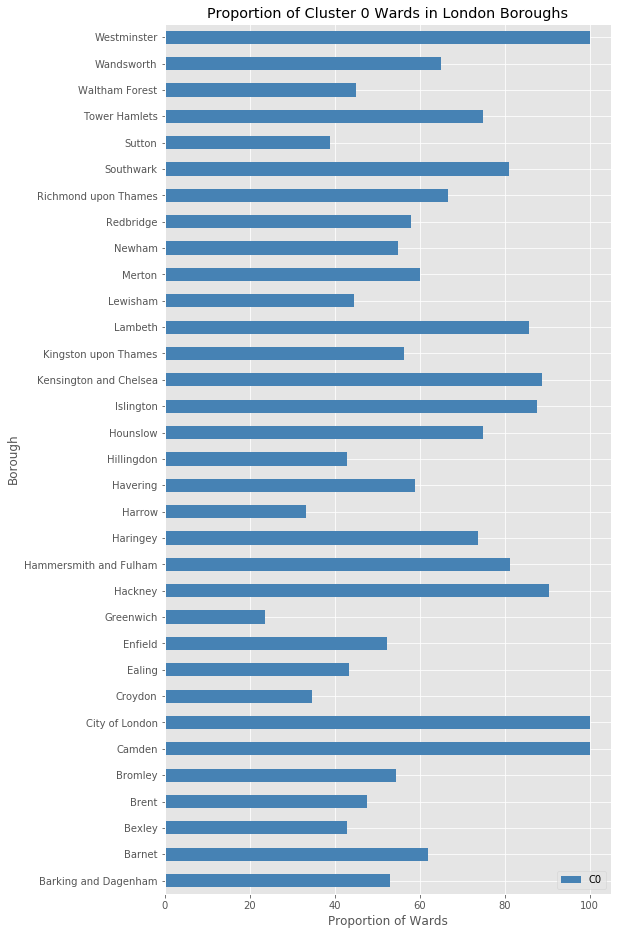

In [61]:
# generate plot
cl_bor.plot(kind='barh', figsize=(8, 16), color='steelblue')
plt.xlabel('Proportion of Wards')
plt.title('Proportion of Cluster 0 Wards in London Boroughs')

# annotate value labels to each country
for index, value in enumerate(cl_bor): 
    label = format(int(value), ',') # format int with commas
    
plt.show()

Figure 2. Percentage of **Gathering Places Wards** (Cluster 0) within London's Boroughs

## 4.5. Demographic description of London Boroughs <a name="explore4"></a>



In the previous part of the report it was shown that London wards are segmented in 5 clusters out of which Cluster 0 (**Gathering Places**), Cluster 1 (**Affluent Living Areas**), Cluster 4 (**Have a Pint on the Way to Home**) and Cluster 5 (**Shopping areas**) are more interesting are people seem to gather there for recreational purposes. In this part of the report we will operate a selection of the most affluent wards in terms of income to decide where to recommend the opening of the **Luxury Wine Bars**. 

Using the second dataset which includes the accesible demographic variable at ward level, they were grouped by Borough to undestand if higher income is associated with a tendency to **conspicuous consumption** which is a required behaviour when attracting people to a luxury wine bar. 


In [62]:
Demographics_London.describe()

,ID_case,Population,% Children 0-15,%_Working_age,Mean Age,Area - Square Kilometres,Population density,Median House Price,Sold_properties,Median Household income,Detached Houses,% semi-detached houses - 2011,% terraced houses - 2011,Flats,% Owners,% Social Rents,Private Rents,% Council tax A/B,% University studies,% Open Space,% travel by bicycle to work - 2011
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,6.250000e+02,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.00000,625.000000,625.000000,625.00000,625.000000,625.000000
mean,313.000000,13813.680000,19.299200,67.918400,35.507200,2.086400,8242.840000,4.344507e+05,188.307200,39263.696000,6.156800,19.494400,23.193600,49.259200,49.212800,22.87680,24.011200,15.908800,37.20960,26.657600,3.411200
std,180.566239,2908.069436,3.789546,5.110453,3.090571,2.599104,4865.868229,2.682056e+05,83.893219,7454.236401,7.549265,15.833885,13.129506,24.594533,18.773989,14.75926,9.978898,13.487993,12.84932,17.616222,3.360623
min,1.000000,5300.000000,6.000000,57.000000,28.000000,0.000000,181.000000,1.730000e+05,37.000000,25090.000000,0.000000,0.000000,1.000000,6.000000,11.000000,1.00000,4.000000,0.000000,12.00000,0.000000,0.000000
25%,157.000000,11650.000000,17.000000,64.000000,33.000000,1.000000,4710.000000,2.800000e+05,133.000000,33600.000000,2.000000,6.000000,13.000000,29.000000,34.000000,11.00000,17.000000,5.000000,27.00000,13.000000,1.000000
50%,313.000000,13600.000000,19.000000,67.000000,35.000000,1.000000,7050.000000,3.635000e+05,174.000000,38200.000000,4.000000,16.000000,21.000000,46.000000,48.000000,20.00000,24.000000,12.000000,35.00000,23.000000,2.000000
75%,469.000000,15700.000000,22.000000,71.000000,38.000000,2.000000,10961.000000,4.850000e+05,222.000000,43470.000000,7.000000,30.000000,32.000000,71.000000,64.000000,34.00000,31.000000,25.000000,47.00000,37.000000,5.000000
max,625.000000,26700.000000,32.000000,83.000000,44.000000,29.000000,29750.000000,3.500000e+06,897.000000,88330.000000,55.000000,82.000000,63.000000,97.000000,90.000000,68.00000,55.000000,61.000000,68.00000,88.000000,19.000000


In [63]:
Demographics_London.groupby(['BOROUGH'])['Population', 'Population density', 'Median House Price','Sold_properties', 
                                         'Median Household income', 'Flats','% Owners', '% Social Rents', 
                                         'Private Rents', '% Council tax A/B','% University studies', 
                                         '% Open Space'].mean().round(1)

,Population,Population density,Median House Price,Sold_properties,Median Household income,Flats,% Owners,% Social Rents,Private Rents,% Council tax A/B,% University studies,% Open Space
BOROUGH,,,,,,,,,,,,
Barking and Dagenham,12082.4,6716.6,219602.9,123.4,33530.6,28.8,46.5,32.9,17.1,23.5,20.2,27.1
Barnet,18731.0,5199.6,436684.4,232.7,39903.8,42.0,57.4,13.7,24.9,8.6,39.9,30.6
Bexley,11288.1,4422.9,254821.1,183.8,37385.7,22.7,72.6,13.6,10.9,14.0,21.3,29.7
Brent,15535.7,8558.8,375747.9,134.9,34403.3,49.3,44.7,22.0,29.1,12.7,32.7,20.3
Bromley,14552.3,3251.4,360181.5,274.3,41478.6,27.4,71.8,13.0,12.1,7.7,32.4,41.4
Camden,12794.4,12508.0,674272.4,150.2,43436.1,84.4,31.7,32.8,31.6,14.1,50.3,16.4
City of London,8100.0,2538.0,765000.0,309.0,63620.0,97.0,42.0,16.0,35.0,4.0,68.0,18.0
Croydon,15881.2,5744.3,283697.8,241.9,37594.2,33.2,59.8,17.7,18.9,15.0,30.8,24.2
Ealing,15191.3,6917.1,404916.6,146.2,36710.9,43.3,51.5,17.6,26.6,13.0,36.4,28.5


## 4.5.1. Aspects correlated with Household Income in London Wards <a name="explore5"></a>



Several variables were compared between Boroughs in order to decice for which aspects people in different region of London behave differently. Only the variables listed below seem to differ strong enough between boroughs.
Scatter plot charts were created to observe which other aspects are correlated with the Median income from London wards.
* In wards with higher median income the **proportion of house owners is higher** (Figure 3). 
* In wards with higher median income the **proportion of private rents is higher** (Figure 8) while the **proportion of social rents is lower** (Figure 6).
* In wards with higher median income the **median house price is higher** (Figure 9) and also the **proportion of flats is increasing** (Figure 7).
* In wards with higher median income the **amount of properties on sale** is higher (Figure 5).
* Finally, it was observed that wards with higher income have smaller population size (Figure 4).

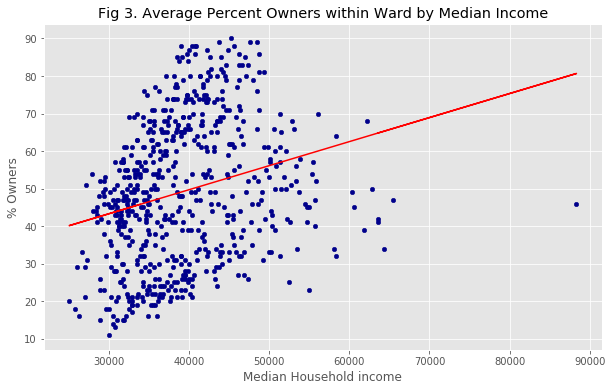

In [64]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['% Owners']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='% Owners', figsize=(10, 6), color='darkblue')

plt.title('Fig 3. Average Percent Owners within Ward by Median Income')
plt.xlabel('Median Household income')
plt.ylabel('% Owners')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()


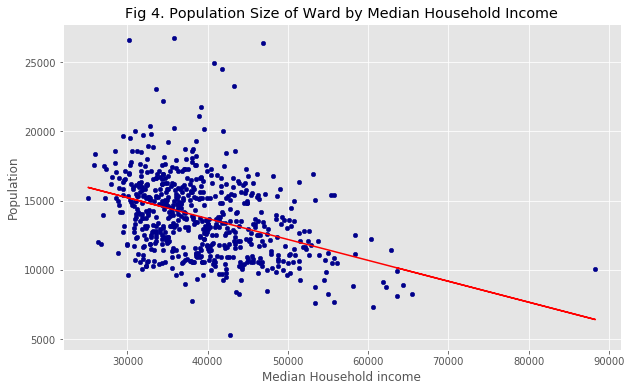

In [65]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['Population']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

#fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='Population', figsize=(10, 6), color='darkblue')

plt.title('Fig 4. Population Size of Ward by Median Household Income')
plt.xlabel('Median Household income')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()

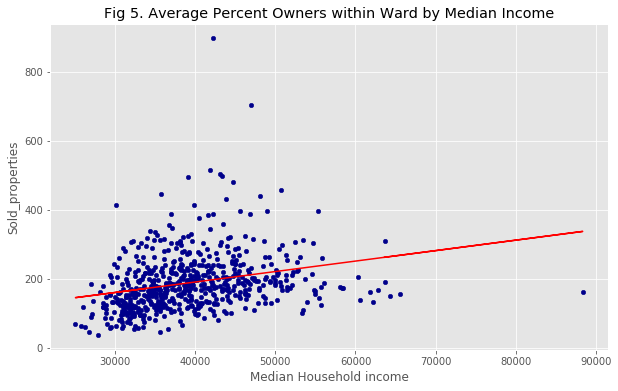

In [66]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['Sold_properties']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='Sold_properties', figsize=(10, 6), color='darkblue')

plt.title('Fig 5. Average Percent Owners within Ward by Median Income')
plt.xlabel('Median Household income')
plt.ylabel('Sold_properties')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()


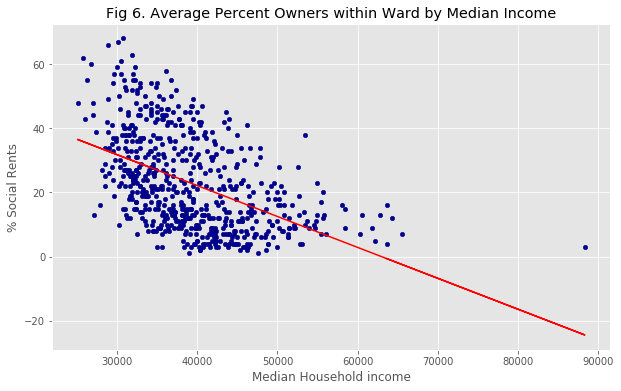

In [67]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['% Social Rents']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='% Social Rents', figsize=(10, 6), color='darkblue')

plt.title('Fig 6. Average Percent Owners within Ward by Median Income')
plt.xlabel('Median Household income')
plt.ylabel('% Social Rents')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()


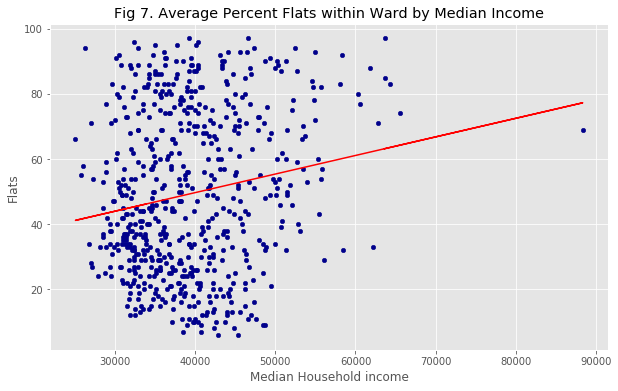

In [68]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['Flats']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

#fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='Flats', figsize=(10, 6), color='darkblue')

plt.title('Fig 7. Average Percent Flats within Ward by Median Income')
plt.xlabel('Median Household income')
plt.ylabel('Flats')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()

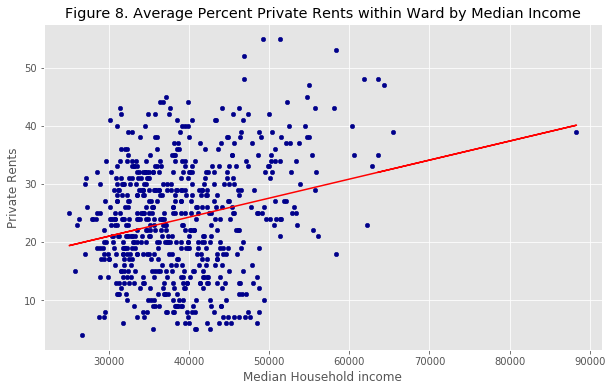

In [69]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['Private Rents']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

#fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='Private Rents', figsize=(10, 6), color='darkblue')

plt.title('Figure 8. Average Percent Private Rents within Ward by Median Income')
plt.xlabel('Median Household income')
plt.ylabel('Private Rents')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()

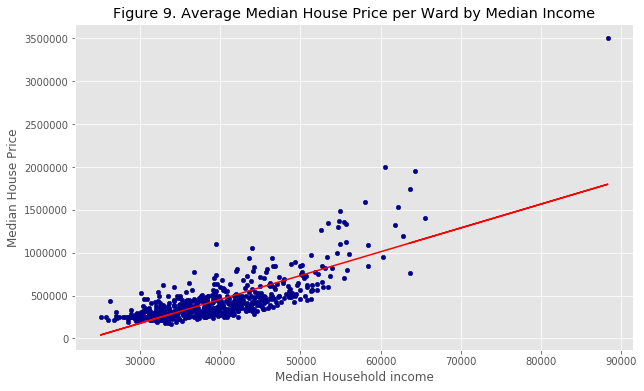

In [70]:
x = Demographics_London['Median Household income']      # year on x-axis
y = Demographics_London['Median House Price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

#fit

Demographics_London.plot(kind='scatter', x='Median Household income', y='Median House Price', figsize=(10, 6), color='darkblue')

plt.title('Figure 9. Average Median House Price per Ward by Median Income')
plt.xlabel('Median Household income')
plt.ylabel('Median House Price')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()

The visual inspection of Figures 3 to 9 revealed that wards with median income higher than 50.000£ seem to behave differently. 
Select the wards where the median income is above 50000 £ per year. 

Consequently, a new dataset including only 55 wards with the highest median income was created.  


In [71]:
HighIncome_demographic = Demographics_London[Demographics_London["Median Household income"] >= 50000]
HighIncome_demographic

,BOROUGH,Ward,ID_case,Ward name,Population,% Children 0-15,%_Working_age,Mean Age,Median Age,Area - Square Kilometres,Population density,Median House Price,Sold_properties,Median Household income,Detached Houses,% semi-detached houses - 2011,% terraced houses - 2011,Flats,% Owners,% Social Rents,Private Rents,% Council tax A/B,% University studies,% Open Space,% travel by bicycle to work - 2011
26,Barnet,Garden Suburb,27,Barnet - Garden Suburb,16950,20,61,39,38,4,3436,825000,263,53090,18,30,12,38,66,4,26,4,57,24,2
102,Camden,Belsize,103,Camden - Belsize,12800,17,69,37,35,0,15937,850000,223,52680,1,3,8,87,41,19,37,9,62,1,4
107,Camden,Frognal and Fitzjohns,108,Camden - Frognal and Fitzjohns,12250,16,69,37,35,1,8133,955000,206,60310,7,7,4,80,49,7,40,6,61,5,3
109,Camden,Hampstead Town,110,Camden - Hampstead Town,11400,17,66,39,39,2,4540,1190000,167,62840,3,10,14,71,50,13,33,5,68,53,4
118,Camden,Swiss Cottage,119,Camden - Swiss Cottage,13200,16,71,36,34,1,10076,740500,217,50340,2,3,5,89,40,16,39,7,60,14,3
165,Ealing,Southfield,166,Ealing - Southfield,13600,18,69,36,36,1,9714,780000,219,50170,3,12,33,51,57,9,31,4,57,14,6
231,Hammersmith and Fulham,Munster,232,Hammersmith and Fulham - Munster,11150,17,74,34,32,0,18250,745000,211,50240,1,3,34,60,44,18,35,2,56,8,8
233,Hammersmith and Fulham,Palace Riverside,234,Hammersmith and Fulham - Palace Riverside,7600,18,66,38,37,1,5000,950000,101,53330,1,13,18,66,56,14,25,1,56,54,9
234,Hammersmith and Fulham,Parsons Green and Walham,235,Hammersmith and Fulham - Parsons Green and Walham,10850,19,69,35,34,0,11944,1330000,175,55720,1,5,38,54,47,20,29,5,56,9,6
240,Haringey,Alexandra,241,Haringey - Alexandra,12050,20,68,36,37,2,4596,625000,177,51450,2,17,30,49,65,9,24,3,58,52,4


In [72]:
HighIncome_demographic.shape

(55, 25)

In [74]:
print(list(HighIncome_demographic['Ward']))

## 5. Results and Discussion <a name="results"></a> 


## 5. Identification of High Income Wards as potential places of opening a Luxury Wine Bar <a name="results1"></a>


### The names of these wards were used as a list to select these wards from the dataset including the Venue Clusters. This dataset included a list of 52 wards which will be mapped as clusters in Map 3 below.  

In [75]:
HighIncome = London_merged["Neighborhood"].isin(['Garden Suburb', 'Belsize', 'Frognal and Fitzjohns', 'Hampstead Town', 'Swiss Cottage', 'Southfield', 'Munster', 
'Palace Riverside', 'Parsons Green and Walham', 'Alexandra', 'Crouch End', 'Highgate', 'Muswell Hill', 
'Chiswick Homefields', 'Abingdon', 'Brompton', 'Campden', 'Courtfield', 'Hans Town', 'Holland', 'Norland', 
'Pembridge', "Queen's Gate", 'Redcliffe', 'Royal Hospital', 'Stanley', 'Hillside', 'Village', 'Wimbledon Park', 
'Barnes', 'East Sheen', 'Kew', 'Mortlake and Barnes Common', 'North Richmond', 'St. Margarets & North Twickenham', 
'South Richmond', 'South Twickenham', 'Teddington', 'Twickenham Riverside', 'Village', "St. Katherine's and Wapping", 
'Balham', 'Nightingale', 'Northcote', 'Shaftesbury', 'Thamesfield', 'Wandsworth Common', 'Abbey Road', 
'Bryanston and Dorset Square', 'Knightsbridge and Belgravia', 'Marylebone High Street', "St. James's", 
'Warwick', 'West End'])

HighIncome_clusters = London_merged[HighIncome]

In [76]:
HighIncome_clusters.shape

(52, 15)

In [77]:
# create map
map_clustersHighincome = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HighIncome_clusters['Latitude'], HighIncome_clusters['Longitude'], 
                                  HighIncome_clusters['Neighborhood'], 
                                  HighIncome_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster - 1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clustersHighincome)
       
map_clustersHighincome

Map 3. Representation of High Income Wards as Venue Clusters. 

In [78]:
CLH_BO = pd.crosstab(HighIncome_clusters['Borough'], HighIncome_clusters['Cluster Labels'], 
                                 margins=True).sort_values('All', ascending=False)
CLH_BO

Cluster Labels,0,4,5,All
Borough,,,,
All,48,2,2,52
Kensington and Chelsea,10,0,0,10
Richmond upon Thames,9,0,0,9
Wandsworth,3,2,1,6
Westminster,6,0,0,6
Camden,5,0,0,5
Haringey,4,0,0,4
Hammersmith and Fulham,3,0,0,3
Merton,2,0,1,3


In [79]:
HighIncome_clusters.sort_values('Borough', ascending = False)

,Neighborhood,Borough,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
552,Bryanston and Dorset Square,Westminster,-0.162910,51.520309,0,Middle Eastern Restaurant,Coffee Shop,Pub,Hotel,CafÃ©,Sandwich Place,Pizza Place,Lebanese Restaurant,Ice Cream Shop,Japanese Restaurant
550,Abbey Road,Westminster,-0.179950,51.534088,0,CafÃ©,Recording Studio,Historic Site,Metro Station,Gift Shop,Persian Restaurant,Garden,Grocery Store,Gym / Fitness Center,Boat or Ferry
569,West End,Westminster,-0.145430,51.511341,0,Clothing Store,Boutique,Hotel,Cosmetics Shop,Art Gallery,Lounge,Toy / Game Store,Steakhouse,French Restaurant,Food Court
567,Warwick,Westminster,-0.143920,51.492279,0,Hotel,Pub,Italian Restaurant,Coffee Shop,CafÃ©,Restaurant,Turkish Restaurant,Chinese Restaurant,Bakery,Sandwich Place
561,Marylebone High Street,Westminster,-0.149160,51.519539,0,Hotel,French Restaurant,Burger Joint,Pizza Place,CafÃ©,Indian Restaurant,Italian Restaurant,Juice Bar,Sandwich Place,Sushi Restaurant
557,Knightsbridge and Belgravia,Westminster,-0.168270,51.502411,0,Coffee Shop,CafÃ©,Italian Restaurant,Boutique,Gym / Fitness Center,Chinese Restaurant,Garden,Steakhouse,Outdoor Sculpture,Fountain
545,Thamesfield,Wandsworth,-0.223530,51.466171,4,Pub,Gym / Fitness Center,Japanese Restaurant,CafÃ©,Coffee Shop,Sushi Restaurant,Restaurant,Tennis Court,Gastropub,Bar
543,Shaftesbury,Wandsworth,-0.158930,51.465961,0,Pub,CafÃ©,Indian Restaurant,Portuguese Restaurant,Italian Restaurant,Thai Restaurant,Indonesian Restaurant,Restaurant,Sushi Restaurant,Supermarket
539,Northcote,Wandsworth,-0.163800,51.456310,0,Pub,Bakery,CafÃ©,Italian Restaurant,Pizza Place,Burger Joint,Sporting Goods Shop,Coffee Shop,Restaurant,Antique Shop
538,Nightingale,Wandsworth,-0.158940,51.442940,0,Coffee Shop,Pub,Italian Restaurant,Bookstore,English Restaurant,Sandwich Place,Grocery Store,Bar,Bakery,Train Station


In [80]:
Wine_Bars = London_venues["Venue Category"].isin(['Winery', 'Wine Bar'])

Wine_Bars = London_venues[Wine_Bars]

Wine_Bars


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
810,810,Bloomsbury,51.521900,-0.13256,Vagabond,51.518695,-0.135003,Wine Bar
1085,1085,Holborn and Covent Garden,51.518978,-0.11466,Noble Rot,51.521880,-0.118596,Wine Bar
1152,1152,Kentish Town,51.551701,-0.13929,Authentique - Epicerie & Bar,51.555434,-0.139411,Wine Bar
1202,1202,Kilburn,51.540352,-0.18741,The Arches,51.542022,-0.180726,Wine Bar
1341,1341,St Pancras and Somers Town,51.534859,-0.13118,The Drop,51.535656,-0.126819,Wine Bar
2492,2492,Parsons Green and Walham,51.473888,-0.19693,Amuse Bouche,51.475183,-0.200816,Wine Bar
2593,2593,Shepherd's Bush Green,51.506512,-0.22563,Albertine,51.505410,-0.224597,Wine Bar
2703,2703,Town,51.475769,-0.20347,Amuse Bouche,51.475183,-0.200816,Wine Bar
4489,4489,Coldharbour,51.464561,-0.10866,The New Zealand Wine Cellar,51.463418,-0.112496,Wine Bar
4506,4506,Coldharbour,51.464561,-0.10866,The Wine Parlour,51.461466,-0.111461,Winery


## 5.2. Overall discussion of the results <a name="results2"></a>



Once the 52 list of wards was selected we created another map (**Map 4**) of the already existing Wine bars. 
Most of them are, interestingly, concentrated in City of London and otherwise scattered in different wards. Many of the wards we identified as potential location for luxury wine bars do not seem to have such a dedicated venue although they definitivelly have restaurants or other luxury places. 
The association table between Boroughs and clusters within the High income dataset suggests the Boroughs in which the investment in some new luxury wine bars are Kensington and Chelsea, Richmond upon Thames, Wandsworth, Westminster, Camden, Haringey and Hammersmith and Fulham. 


In [81]:
map_wine_bars = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(Wine_Bars['Venue Latitude'], Wine_Bars['Venue Longitude'], 
                                           Wine_Bars['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wine_bars)  
    
map_wine_bars

Map 4. Representation of existing Wine Bars as provided by Fourthsquare API.  

## 6. Recommendations <a name="Recommendations"></a>

* Corroborating maps 3 and 4 the 1st venue where is feasible to open a luxury wine bar would be **Richmond upon Thames** which has 9 high income clusters but no dedicated wine bar. 
* Although **Kensington and Chelsea** and **Westminster** have few wine pubs, the affluence of the area and the abundance of tourists allows the opening of another 1 or 2 wine bars.
Wandsworth in the South part of London and Haringey in North are other two affluent areas which can support the opening of new luxury wine bars. 
Wards such as Alexandra (near Alexandra's Palace) or Hapstead town in Haringey/Camden, West End in Westminster seem to be recommended for such investment as they attract not only tourists but they have affluent Londoners who might be targeted by such a new venue. 
Opening a wine bart in more isolated wards such as Teddington, Twickenham Riverside, Kew or Parsons Green and Walham would require to rely more on local people but sesonaly on tourists also who might come in the area for tennis or rugby events.    
                                                      
                         
                         
* If you read this Notebook please email me any comments or suggestions to my email sebastian@bianalytics.org                